# KNN


In [33]:
import pandas as pd
import numpy as np
import preprocessing as pp
import formatPredictions as fp
import metrics as m
import datasets as datasets
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import GridSearchCV

# Importacion KNN
from sklearn.neighbors import KNeighborsClassifier

# Importacion preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [34]:
def normalizar_datos_estandar(X_train):
  standardScaler = StandardScaler() 
  standardScaler.fit(X_train)   
  return standardScaler

In [35]:
def normalizar_datos_minmax(X_train):
  minMaxScaler = MinMaxScaler()
  minMaxScaler.fit(X_train)   
  return minMaxScaler

# Analisis de hiperparametros
# Grid Search con Cross Validation

In [36]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 
X_test_normalized = standard_scaler_features_completos.transform(X_test)

In [37]:
knn_generico = KNeighborsClassifier()

In [38]:
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 30, num=6)]
weights= ['uniform', 'distance']
algorithm= ['auto', 'ball_tree', 'kd_tree', 'brute']
n_jobs= [-1]

In [39]:
param_grid  = {'n_neighbors': n_neighbors,
               'weights': weights,
               'algorithm': algorithm,
               'n_jobs': n_jobs}

In [40]:
pprint(param_grid)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'n_jobs': [-1],
 'n_neighbors': [5, 10, 15, 20, 25, 30],
 'weights': ['uniform', 'distance']}


In [41]:
grid_search = GridSearchCV(estimator = knn_generico, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [42]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.3min
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 21.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1], 'n_neighbors': [5, 10, 15, 20, 25, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [43]:
grid_search.best_params_

{'algorithm': 'ball_tree',
 'n_jobs': -1,
 'n_neighbors': 20,
 'weights': 'uniform'}

# Entrenamiento con todos los features y normalizacion estandar

In [44]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [45]:
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 
X_test_normalized = standard_scaler_features_completos.transform(X_test)

In [46]:
knn_features_completos_normalizacion_estandar = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree', n_jobs= -1, weights='uniform')
knn_features_completos_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.8423153692614771

Precision: 0.7055682684973302

Recall: 0.9219729128764909

F1 Score: 0.6430309350017378

Matriz de confusion: 
[[4561  386]
 [ 641  925]]

AUC-ROC: 



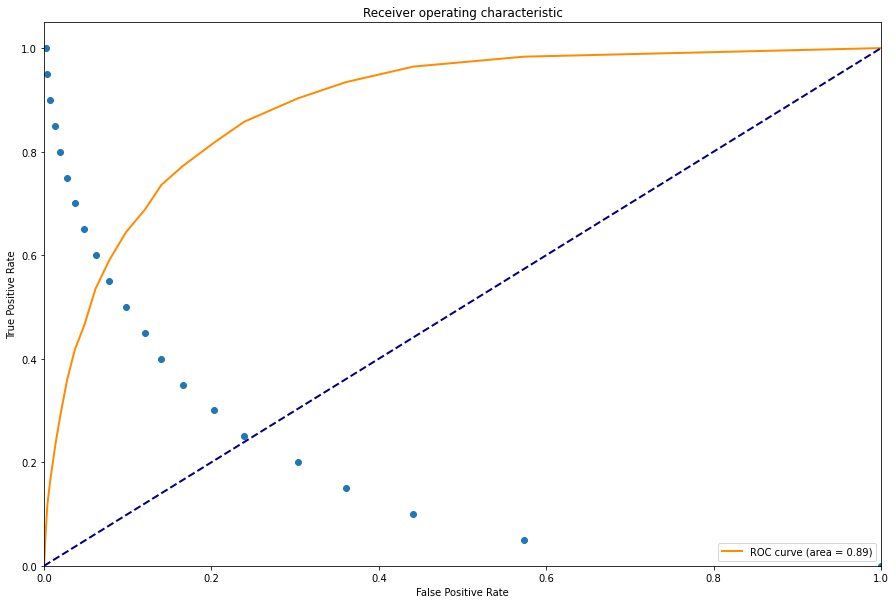

0.8886572508952496

In [47]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con todos los features y normalizacion MinMax

In [48]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [49]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [50]:
knn_features_completos_normalizacion_minmax = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree', n_jobs= -1, weights='uniform')
knn_features_completos_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_completos_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.8427759864885613

Precision: 0.704066265060241

Recall: 0.9205579138872043

F1 Score: 0.6461644782308223

Matriz de confusion: 
[[4554  393]
 [ 631  935]]

AUC-ROC: 



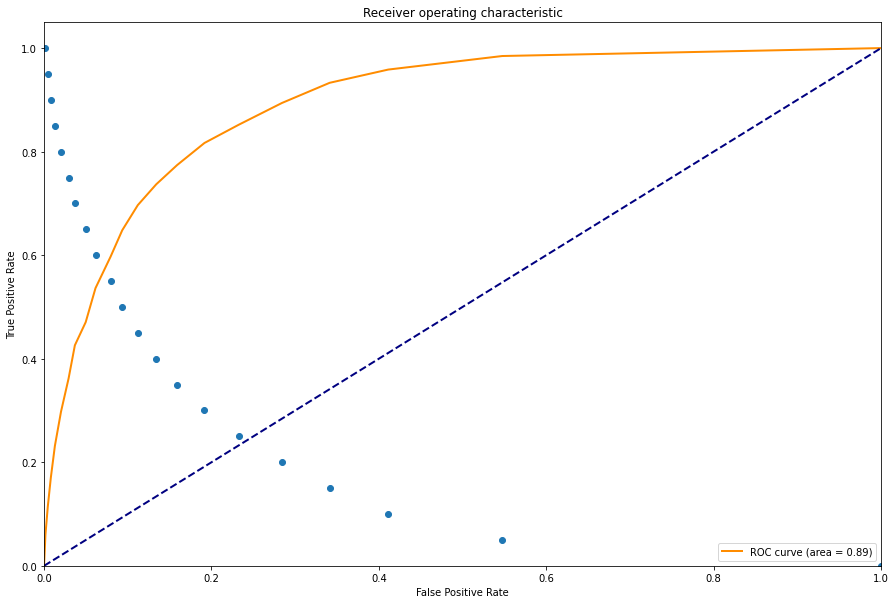

0.8923291229303929

In [51]:
m.getMetrics(y_test, y_pred, knn_features_completos_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion estandar

In [52]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [53]:
standard_scaler_features_seleccion = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_seleccion.transform(X_train) 
X_test_normalized = standard_scaler_features_seleccion.transform(X_test)

In [54]:
knn_features_seleccion_normalizacion_estandar = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree', n_jobs= -1, weights='uniform')
knn_features_seleccion_normalizacion_estandar.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_estandar.predict(X_test_normalized)

# Metricas

Accuracy: 0.8102257024412713

Precision: 0.6524953789279113

Recall: 0.9239943400040429

F1 Score: 0.5332326283987915

Matriz de confusion: 
[[4571  376]
 [ 860  706]]

AUC-ROC: 



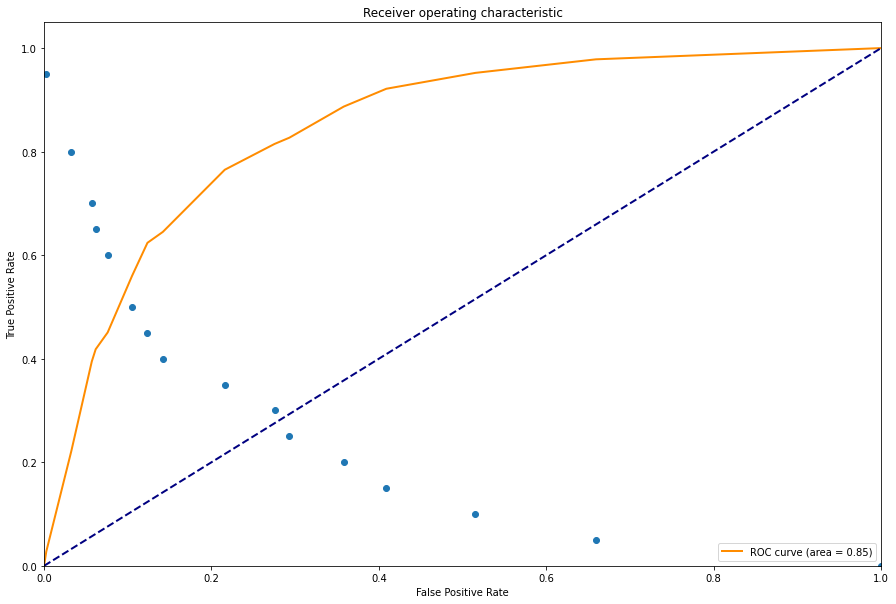

0.8476963088430853

In [55]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_estandar.predict_proba(X_test_normalized)[:,1])

# Entrenamiento con seleccion y normalizacion MinMax

In [56]:
dfTrain = datasets.getDataTrain()

dfTrain_feature_engineering = pp.feature_engineering_con_seleccion(dfTrain)

X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)

In [57]:
minmax_scaler_features_completos = normalizar_datos_minmax(X_train)
X_train = minmax_scaler_features_completos.transform(X_train) 
X_test_normalized = minmax_scaler_features_completos.transform(X_test)

In [58]:
knn_features_seleccion_normalizacion_minmax = KNeighborsClassifier(n_neighbors=20, algorithm='ball_tree', n_jobs= -1, weights='uniform')
knn_features_seleccion_normalizacion_minmax.fit(X_train, y_train)
y_pred = knn_features_seleccion_normalizacion_minmax.predict(X_test_normalized)

# Metricas

Accuracy: 0.8125287885766928

Precision: 0.6433915211970075

Recall: 0.913280776228017

F1 Score: 0.5590465872156013

Matriz de confusion: 
[[4518  429]
 [ 792  774]]

AUC-ROC: 



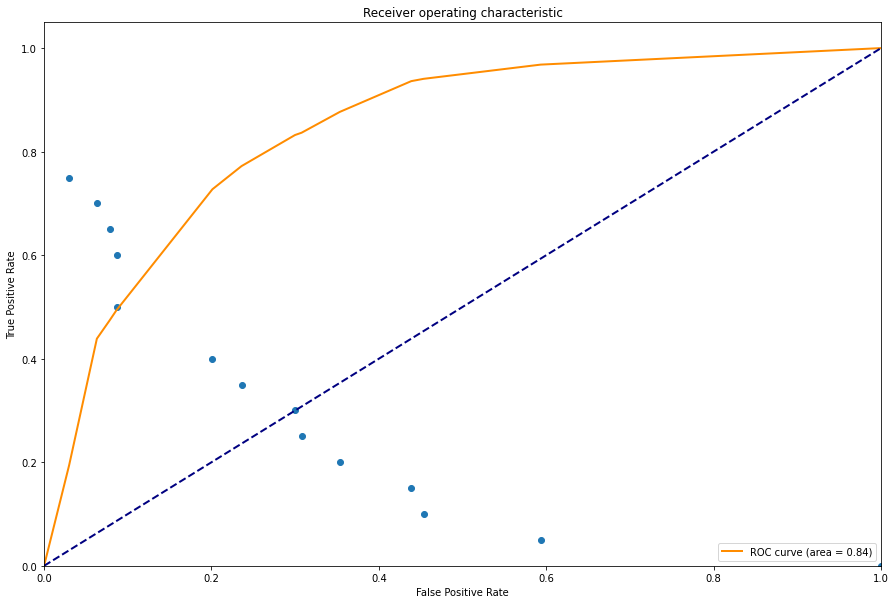

0.8421868872629696

In [59]:
m.getMetrics(y_test, y_pred, knn_features_seleccion_normalizacion_minmax.predict_proba(X_test_normalized)[:,1])

# Prediccion del set objectivo usando entrenamiento con todos los features y normalizacion estandar

In [60]:
dfTrain = datasets.getDataTrain()
dfTrain_feature_engineering = pp.preprocessing_con_todos_los_features(dfTrain)
X = dfTrain_feature_engineering.drop(columns = 'tiene_alto_valor_adquisitivo')
y = dfTrain_feature_engineering.tiene_alto_valor_adquisitivo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = pp.GetSeedForTrainSplit(), test_size=0.20)
standard_scaler_features_completos = normalizar_datos_estandar(X_train)
X_train = standard_scaler_features_completos.transform(X_train) 

In [62]:
# Obtengo el set para predecir
dfObjetivo = datasets.getDataHoldout()

# Elimino columnas "representatividad_poblacional" y "id"
dfObjetivo.drop(columns = ['representatividad_poblacional', 'id'], inplace = True)

dfObjetivo_feature_engineering = pp.preprocessing_con_todos_los_features(dfObjetivo)
X_normalized = standard_scaler_features_completos.transform(dfObjetivo_feature_engineering)

predicciones = knn_features_completos_normalizacion_minmax.predict(X_normalized)
predicciones

array([0, 0, 1, ..., 1, 0, 1])

In [63]:
fp.exportPredictions(fp.formatPredictions(predicciones), "KNN")